## **Gold Price Prediction** 
**Objective :**- Forecasting gold price for next 30 days based on historical data.
(Considering last four years of historical data)

In [2]:
!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976


In [7]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

C:\Python\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
data.head()

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976


In [9]:
data.tail()

,Price
Date,
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976
2022-01-06,1788.699951
2022-01-07,1797.000000


In [10]:
train = data.head(813)
test = data.tail(200)

## **EDA**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2018-01-02 to 2022-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1013 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


**Line chart**

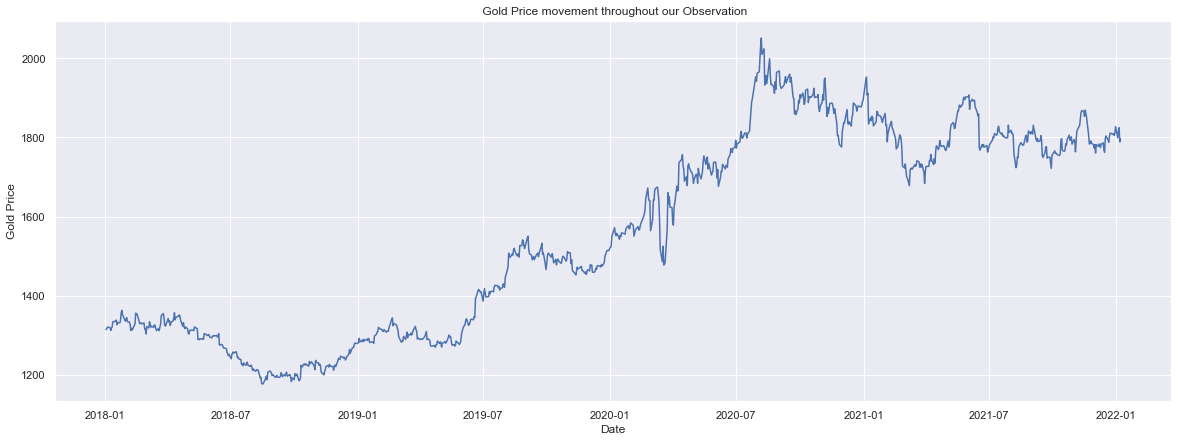

In [12]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

In [11]:
#from IPython.core.pylabtools import figsize
#plt.figure(figsize=(20,7))
#data.Price.plot()
#plt.title(" Gold Price movement throughout our Observation")
#plt.ylabel('Gold Price')
#plt.show()

In [13]:
data

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2018-01-02 to 2022-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1013 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [15]:
data.isnull().sum()

Price    0
dtype: int64

In [16]:
print(len(data))

1013


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1013.0,1560.023789,249.376143,1176.199951,1311.599976,1541.0,1792.699951,2051.5


### **Checking for Stationarity in data using Dickey-Fuller test**

In [18]:
X = train['Price'].values

result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "} stationary')

ADF Statistic: -0.527854
p-value: 0.886465
Critical Values:
Inference: Time Series is non stationary


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

### **Auto correlation graph**

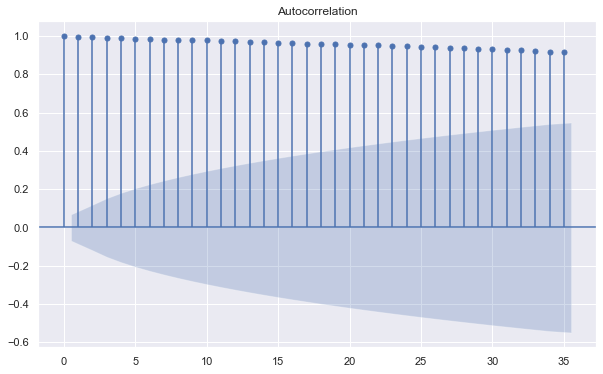

In [19]:
plt.rc("figure", figsize=(10,6))
plot_acf(train['Price'],lags=35)
plt.show()

### **PACF graph**

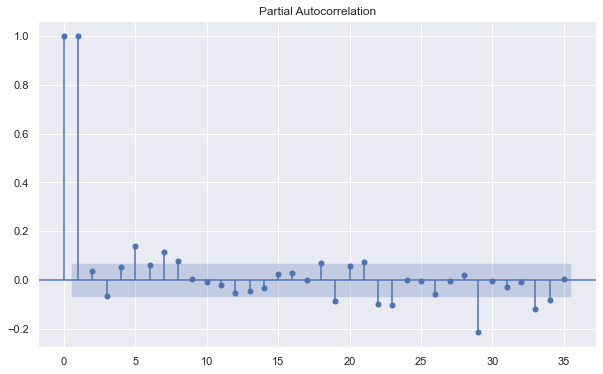

In [20]:
plot_pacf(train['Price'],lags=35)
plt.show()

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [21]:
data_without_sea = train.diff().dropna()

In [22]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2018-01-03 to 2021-03-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   812 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


### **Again checking for Stationarity in data using Dickey-Fuller test**

In [23]:
X = data_without_sea['Price'].values
result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "}stationary')

ADF Statistic: -13.604258
p-value: 0.000000
Critical Values:
Inference: Time Series is  stationary


### **Auto correlation graph after 1 step differencing**

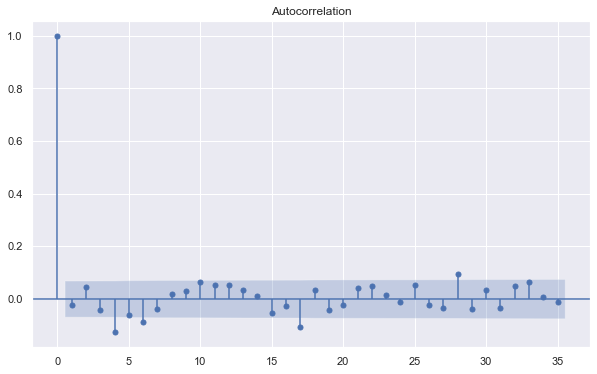

In [24]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea['Price'], lags=35)
plt.show()

### **Partial Auto Correlation graph after differencing**

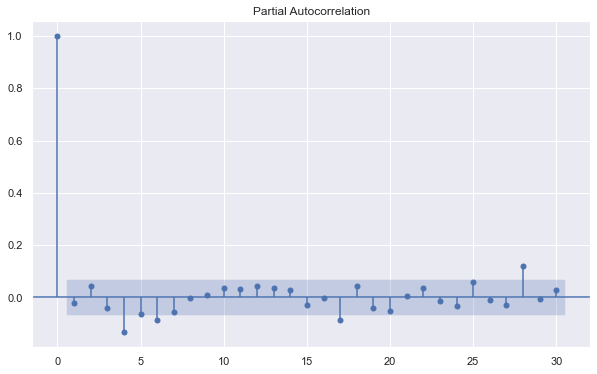

In [25]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea)
plt.show()

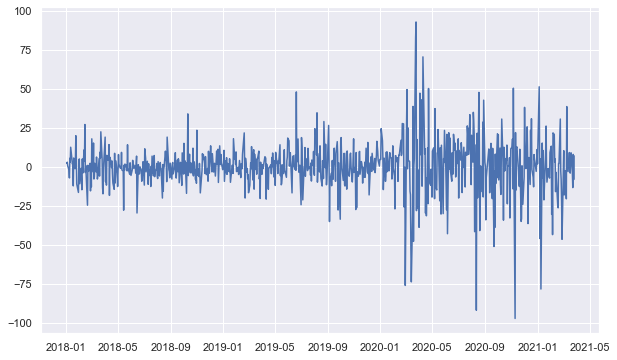

In [26]:
plt.plot(data_without_sea)
plt.show()

In [27]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2018-01-03 to 2021-03-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   812 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [28]:
# separate out a validation dataset

print('Dataset %d, Validation %d' % (len(train), len(test)))
train.to_csv('dataset.csv', header=False)
test.to_csv('validation.csv', header=False)


Dataset 813, Validation 200


### **Persistence/ Base model**

In [29]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

In [30]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1664.800, Expected=1665.400
>Predicted=1665.400, Expected=1736.200
>Predicted=1736.200, Expected=1744.800
>Predicted=1744.800, Expected=1756.700
>Predicted=1756.700, Expected=1727.200
>Predicted=1727.200, Expected=1720.400
>Predicted=1720.400, Expected=1689.200
>Predicted=1689.200, Expected=1701.600
>Predicted=1701.600, Expected=1678.200
>Predicted=1678.200, Expected=1728.700
>Predicted=1728.700, Expected=1733.300
>Predicted=1733.300, Expected=1723.500
>Predicted=1723.500, Expected=1711.900
>Predicted=1711.900, Expected=1710.500
>Predicted=1710.500, Expected=1703.400
>Predicted=1703.400, Expected=1684.200
>Predicted=1684.200, Expected=1694.500
>Predicted=1694.500, Expected=1706.900
>Predicted=1706.900, Expected=1704.400
>Predicted=1704.400, Expected=1684.200
>Predicted=1684.200, Expected=1721.800
>Predicted=1721.800, Expected=1709.900
>Predicted=1709.900, Expected=1695.300
>Predicted=1695.300, Expected=1704.400
>Predicted=1704.400, Expected=1713.900
>Predicted=1713.900, Expe

### **ARIMA Hyperparameters**

In [31]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### **Grid search for p,d,q values**

In [32]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [33]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=402.694
ARIMA(0, 0, 1) RMSE=212.166
ARIMA(0, 1, 0) RMSE=21.473
ARIMA(0, 1, 1) RMSE=21.521
ARIMA(0, 1, 2) RMSE=21.564
ARIMA(0, 2, 0) RMSE=31.861
ARIMA(0, 2, 1) RMSE=21.550
ARIMA(0, 2, 2) RMSE=21.596
ARIMA(1, 0, 0) RMSE=21.486
ARIMA(1, 1, 0) RMSE=21.524
ARIMA(1, 1, 1) RMSE=21.558
ARIMA(1, 1, 2) RMSE=21.570
ARIMA(1, 2, 0) RMSE=26.287
ARIMA(1, 2, 1) RMSE=21.599
ARIMA(2, 0, 0) RMSE=7555.688
ARIMA(2, 1, 0) RMSE=21.554
ARIMA(2, 1, 1) RMSE=21.563
ARIMA(2, 1, 2) RMSE=21.765
ARIMA(2, 2, 0) RMSE=25.099
Best ARIMA(0, 1, 0) RMSE=21.473


### **Build Model based on the optimized values**

In [34]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [35]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

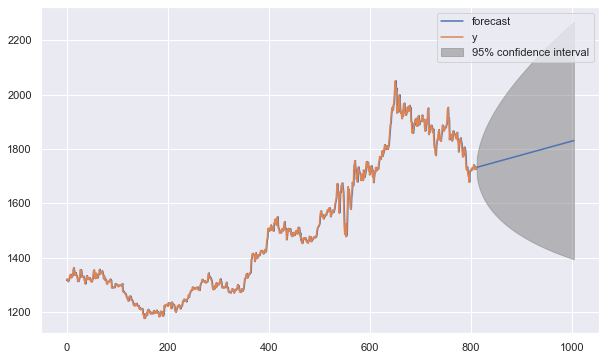

In [36]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=200)[0]
model_fit.plot_predict(1, 1004)
plt.show()

In [37]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

54.76417440060101

In [38]:
val[1]

0      1712.099976
1      1683.900024
2      1713.800049
3      1726.500000
4      1727.000000
          ...     
195    1799.400024
196    1814.000000
197    1824.599976
198    1788.699951
199    1797.000000
Name: 1, Length: 200, dtype: float64

In [39]:
forecast

array([1732.71289815, 1733.22584513, 1733.73879211, 1734.25173909,
       1734.76468607, 1735.27763305, 1735.79058003, 1736.303527  ,
       1736.81647398, 1737.32942096, 1737.84236794, 1738.35531492,
       1738.8682619 , 1739.38120888, 1739.89415586, 1740.40710284,
       1740.92004982, 1741.43299679, 1741.94594377, 1742.45889075,
       1742.97183773, 1743.48478471, 1743.99773169, 1744.51067867,
       1745.02362565, 1745.53657263, 1746.04951961, 1746.56246658,
       1747.07541356, 1747.58836054, 1748.10130752, 1748.6142545 ,
       1749.12720148, 1749.64014846, 1750.15309544, 1750.66604242,
       1751.1789894 , 1751.69193638, 1752.20488335, 1752.71783033,
       1753.23077731, 1753.74372429, 1754.25667127, 1754.76961825,
       1755.28256523, 1755.79551221, 1756.30845919, 1756.82140617,
       1757.33435314, 1757.84730012, 1758.3602471 , 1758.87319408,
       1759.38614106, 1759.89908804, 1760.41203502, 1760.924982  ,
       1761.43792898, 1761.95087596, 1762.46382294, 1762.97676

### **Combine train and test data and build final model**

In [40]:
# fit model
#data = read_csv('data', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [41]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

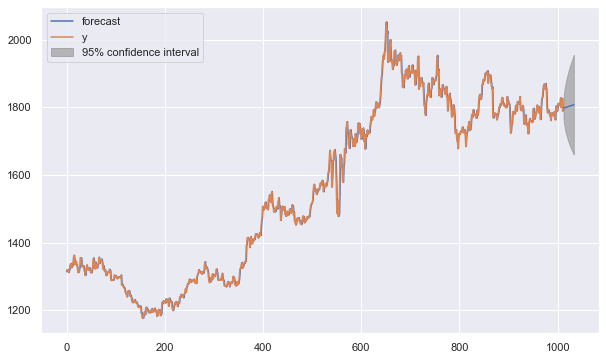

In [42]:
forecast_final=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,1034)
plt.show()

In [43]:
forecast_final

array([1797.47756922, 1797.95513844, 1798.43270765, 1798.91027687,
       1799.38784609, 1799.86541531, 1800.34298453, 1800.82055375,
       1801.29812296, 1801.77569218, 1802.2532614 , 1802.73083062,
       1803.20839984, 1803.68596905, 1804.16353827, 1804.64110749,
       1805.11867671, 1805.59624593, 1806.07381515, 1806.55138436,
       1807.02895358, 1807.5065228 , 1807.98409202, 1808.46166124,
       1808.93923046, 1809.41679967, 1809.89436889, 1810.37193811,
       1810.84950733, 1811.32707655])

In [44]:
import pickle
pickle_out = open("model_arima.pkl","wb")
pickle.dump(model_fit, pickle_out)
pickle_out.close()